# Empowering Financial Security: 

### Detecting Fraudulent Transactions using Advanced Machine Learning Techniques and Predictive Analytics

**accountAgeDays:** The number of days the account has been active.


**numItems:** The number of items associated with the account.


**localTime:** Some measure of time, possibly in hours or a similar unit.


**paymentMethod:** The method used for payment (e.g., PayPal, store credit, credit card).


**paymentMethodAgeDays:** The number of days since the payment method was associated with the account.(It indicates how long ago the current payment method (e.g.,PayPal, credit card) was linked to the account.)


**isWeekend:** A binary indicator of whether the transaction occurred on a weekend (1 for yes, 0 for no).


**Category:** The category of the transaction (e.g., electronics, shopping, food).


**Label(Target column)** A binary label (0 for legitimate, 1 for potentially fraudulent)

# Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;
warnings.filterwarnings('ignore');


In [2]:
df = pd.read_csv(r"D:\Downloads\payment_fraud.csv")
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [4]:
df.isna().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [5]:
df.accountAgeDays.isna().sum()

0

In [6]:
df.accountAgeDays.nunique()

1999

In [7]:
df.numItems.value_counts()

1     37398
2      1348
5       168
3       164
10       71
4        42
6        15
8         5
7         5
12        1
15        1
29        1
9         1
11        1
Name: numItems, dtype: int64

In [8]:
df.numItems.nunique()

14

In [9]:
df.numItems.unique()

array([ 1,  2,  3,  4,  5, 10,  6, 12,  8, 15, 29,  9,  7, 11],
      dtype=int64)

In [10]:
df.localTime.value_counts()

4.921318    2444
4.921349    2353
4.876771    2333
4.886641    2313
5.034622    2310
4.524580    2302
4.748314    2284
5.017904    2276
4.745402    2264
4.836982    2253
4.962055    2244
4.965339    2155
4.895263    2081
5.040929    2050
4.742303    1696
4.505662    1531
4.057414    1088
4.461622    1083
3.954522     646
3.575983     443
3.483951     365
3.066058     264
2.948940     228
2.596228     213
0.421214       2
Name: localTime, dtype: int64

In [11]:
df.localTime.nunique()

25

In [12]:
df.localTime.unique()

array([4.745402 , 4.742303 , 4.921318 , 4.886641 , 5.040929 , 4.962055 ,
       4.921349 , 4.876771 , 4.748314 , 4.461622 , 4.505662 , 4.836982 ,
       4.895263 , 5.034622 , 4.057414 , 3.483951 , 2.596228 , 5.017904 ,
       4.965339 , 4.52458  , 2.94894  , 3.066058 , 3.575983 , 3.954522 ,
       0.4212135])

In [13]:
df.localTime.isna().sum()

0

In [14]:
df.paymentMethod.value_counts()

creditcard     28004
paypal          9303
storecredit     1914
Name: paymentMethod, dtype: int64

In [15]:
df.paymentMethod.nunique()

3

In [16]:
df.paymentMethod.unique()

array(['paypal', 'storecredit', 'creditcard'], dtype=object)

In [17]:
df.paymentMethod.isna().sum()

0

In [18]:
df.paymentMethodAgeDays.isna().sum()

0

In [19]:
df.paymentMethodAgeDays.nunique()

17094

In [20]:
df.paymentMethodAgeDays.value_counts()

0.000000      13907
0.000694       2334
0.001389        875
0.002083        500
0.002778        375
              ...  
300.893750        1
433.043056        1
707.093056        1
0.235417          1
236.082639        1
Name: paymentMethodAgeDays, Length: 17094, dtype: int64

In [21]:
df.isWeekend.value_counts()

0.0    19348
1.0    19313
Name: isWeekend, dtype: int64

In [22]:
df.isWeekend.isnull().sum()

560

In [23]:
#isWeekend:
(560/39221)*100

1.427806532214885

In [24]:
df.Category.value_counts()

shopping       13328
food           12964
electronics    12834
Name: Category, dtype: int64

In [25]:
df.Category.isna().sum()

95

In [26]:
#Category:
(95/39221)*100

0.24221717957216798

In [27]:
df.label.value_counts()

0    38661
1      560
Name: label, dtype: int64

In [28]:
df.label.isna().sum()

0

NOTE:
- Features with null values are isWeekend, Category
- The feature **isWeekend** has 1.42% of null values
- The feature **Category** has 0.24% of null values

In [29]:
df=df.rename({'label':'Target'},axis=1)
df

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,Target
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0
...,...,...,...,...,...,...,...,...
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0
39219,237,1,4.921318,creditcard,236.082639,shopping,1.0,0


In [30]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,Target
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [31]:
df.dtypes

accountAgeDays            int64
numItems                  int64
localTime               float64
paymentMethod            object
paymentMethodAgeDays    float64
Category                 object
isWeekend               float64
Target                    int64
dtype: object

In [32]:


df['localTime'] = pd.to_datetime(df['localTime'])
df['localTime_month'] = df['localTime'].dt.month


df['localTime'] = pd.to_datetime(df['localTime'])
df['localTime_weekday'] = df['localTime'].dt.weekday

df['localTime'] = pd.to_datetime(df['localTime'])
df['localTime_hour'] = df['localTime'].dt.hour

df['localTime'] = pd.to_datetime(df['localTime'])
df['localTime_minute'] = df['localTime'].dt.minute

df['localTime'] = pd.to_datetime(df['localTime'])
df['localTime_seconds'] = df['localTime'].dt.second



In [33]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,Target,localTime_month,localTime_weekday,localTime_hour,localTime_minute,localTime_seconds
0,29,1,1970-01-01 00:00:00.000000004,paypal,28.204861,shopping,0.0,0,1,3,0,0,0
1,725,1,1970-01-01 00:00:00.000000004,storecredit,0.000000,electronics,0.0,0,1,3,0,0,0
2,845,1,1970-01-01 00:00:00.000000004,creditcard,0.000000,food,1.0,0,1,3,0,0,0
3,503,1,1970-01-01 00:00:00.000000004,creditcard,0.000000,electronics,1.0,0,1,3,0,0,0
4,2000,1,1970-01-01 00:00:00.000000005,creditcard,0.000000,shopping,0.0,0,1,3,0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   accountAgeDays        39221 non-null  int64         
 1   numItems              39221 non-null  int64         
 2   localTime             39221 non-null  datetime64[ns]
 3   paymentMethod         39221 non-null  object        
 4   paymentMethodAgeDays  39221 non-null  float64       
 5   Category              39126 non-null  object        
 6   isWeekend             38661 non-null  float64       
 7   Target                39221 non-null  int64         
 8   localTime_month       39221 non-null  int64         
 9   localTime_weekday     39221 non-null  int64         
 10  localTime_hour        39221 non-null  int64         
 11  localTime_minute      39221 non-null  int64         
 12  localTime_seconds     39221 non-null  int64         
dtypes: datetime64[ns

In [35]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,Target,localTime_month,localTime_weekday,localTime_hour,localTime_minute,localTime_seconds
0,29,1,1970-01-01 00:00:00.000000004,paypal,28.204861,shopping,0.0,0,1,3,0,0,0
1,725,1,1970-01-01 00:00:00.000000004,storecredit,0.000000,electronics,0.0,0,1,3,0,0,0
2,845,1,1970-01-01 00:00:00.000000004,creditcard,0.000000,food,1.0,0,1,3,0,0,0
3,503,1,1970-01-01 00:00:00.000000004,creditcard,0.000000,electronics,1.0,0,1,3,0,0,0
4,2000,1,1970-01-01 00:00:00.000000005,creditcard,0.000000,shopping,0.0,0,1,3,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   accountAgeDays        39221 non-null  int64         
 1   numItems              39221 non-null  int64         
 2   localTime             39221 non-null  datetime64[ns]
 3   paymentMethod         39221 non-null  object        
 4   paymentMethodAgeDays  39221 non-null  float64       
 5   Category              39126 non-null  object        
 6   isWeekend             38661 non-null  float64       
 7   Target                39221 non-null  int64         
 8   localTime_month       39221 non-null  int64         
 9   localTime_weekday     39221 non-null  int64         
 10  localTime_hour        39221 non-null  int64         
 11  localTime_minute      39221 non-null  int64         
 12  localTime_seconds     39221 non-null  int64         
dtypes: datetime64[ns

In [37]:
df.drop(['localTime'],axis=1,inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   paymentMethod         39221 non-null  object 
 3   paymentMethodAgeDays  39221 non-null  float64
 4   Category              39126 non-null  object 
 5   isWeekend             38661 non-null  float64
 6   Target                39221 non-null  int64  
 7   localTime_month       39221 non-null  int64  
 8   localTime_weekday     39221 non-null  int64  
 9   localTime_hour        39221 non-null  int64  
 10  localTime_minute      39221 non-null  int64  
 11  localTime_seconds     39221 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 3.6+ MB


In [39]:
df.head(3)

,accountAgeDays,numItems,paymentMethod,paymentMethodAgeDays,Category,isWeekend,Target,localTime_month,localTime_weekday,localTime_hour,localTime_minute,localTime_seconds
0,29,1,paypal,28.204861,shopping,0.0,0,1,3,0,0,0
1,725,1,storecredit,0.000000,electronics,0.0,0,1,3,0,0,0
2,845,1,creditcard,0.000000,food,1.0,0,1,3,0,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   paymentMethod         39221 non-null  object 
 3   paymentMethodAgeDays  39221 non-null  float64
 4   Category              39126 non-null  object 
 5   isWeekend             38661 non-null  float64
 6   Target                39221 non-null  int64  
 7   localTime_month       39221 non-null  int64  
 8   localTime_weekday     39221 non-null  int64  
 9   localTime_hour        39221 non-null  int64  
 10  localTime_minute      39221 non-null  int64  
 11  localTime_seconds     39221 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 3.6+ MB


In [41]:
df= pd.get_dummies(df, columns = ['paymentMethod','Category']) 
df

,accountAgeDays,numItems,paymentMethodAgeDays,isWeekend,Target,localTime_month,localTime_weekday,localTime_hour,localTime_minute,localTime_seconds,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
0,29,1,28.204861,0.0,0,1,3,0,0,0,0,1,0,0,0,1
1,725,1,0.000000,0.0,0,1,3,0,0,0,0,0,1,1,0,0
2,845,1,0.000000,1.0,0,1,3,0,0,0,1,0,0,0,1,0
3,503,1,0.000000,1.0,0,1,3,0,0,0,1,0,0,1,0,0
4,2000,1,0.000000,0.0,0,1,3,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39216,986,1,0.000000,0.0,0,1,3,0,0,0,1,0,0,0,0,1
39217,1647,1,377.930556,0.0,0,1,3,0,0,0,1,0,0,0,0,1
39218,1591,1,0.000000,1.0,0,1,3,0,0,0,1,0,0,0,0,1
39219,237,1,236.082639,1.0,0,1,3,0,0,0,1,0,0,0,0,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             39221 non-null  int64  
 1   numItems                   39221 non-null  int64  
 2   paymentMethodAgeDays       39221 non-null  float64
 3   isWeekend                  38661 non-null  float64
 4   Target                     39221 non-null  int64  
 5   localTime_month            39221 non-null  int64  
 6   localTime_weekday          39221 non-null  int64  
 7   localTime_hour             39221 non-null  int64  
 8   localTime_minute           39221 non-null  int64  
 9   localTime_seconds          39221 non-null  int64  
 10  paymentMethod_creditcard   39221 non-null  uint8  
 11  paymentMethod_paypal       39221 non-null  uint8  
 12  paymentMethod_storecredit  39221 non-null  uint8  
 13  Category_electronics       39221 non-null  uin

In [43]:
df = df.astype({"paymentMethod_creditcard": int, "paymentMethod_paypal": int, "paymentMethod_storecredit": int, 
                "Category_electronics": int, "Category_food": int, "Category_shopping": int})



In [44]:
df = df.astype({"paymentMethodAgeDays": int})

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             39221 non-null  int64  
 1   numItems                   39221 non-null  int64  
 2   paymentMethodAgeDays       39221 non-null  int32  
 3   isWeekend                  38661 non-null  float64
 4   Target                     39221 non-null  int64  
 5   localTime_month            39221 non-null  int64  
 6   localTime_weekday          39221 non-null  int64  
 7   localTime_hour             39221 non-null  int64  
 8   localTime_minute           39221 non-null  int64  
 9   localTime_seconds          39221 non-null  int64  
 10  paymentMethod_creditcard   39221 non-null  int32  
 11  paymentMethod_paypal       39221 non-null  int32  
 12  paymentMethod_storecredit  39221 non-null  int32  
 13  Category_electronics       39221 non-null  int

In [46]:
df.isna().sum()

accountAgeDays                 0
numItems                       0
paymentMethodAgeDays           0
isWeekend                    560
Target                         0
localTime_month                0
localTime_weekday              0
localTime_hour                 0
localTime_minute               0
localTime_seconds              0
paymentMethod_creditcard       0
paymentMethod_paypal           0
paymentMethod_storecredit      0
Category_electronics           0
Category_food                  0
Category_shopping              0
dtype: int64

In [47]:
df=df[['accountAgeDays','numItems','localTime_month','localTime_weekday','localTime_hour','localTime_minute','localTime_seconds','paymentMethod_creditcard','paymentMethod_paypal','paymentMethod_storecredit','paymentMethodAgeDays','isWeekend','Category_electronics','Category_food','Category_shopping','Target']]

In [48]:
df

,accountAgeDays,numItems,localTime_month,localTime_weekday,localTime_hour,localTime_minute,localTime_seconds,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,paymentMethodAgeDays,isWeekend,Category_electronics,Category_food,Category_shopping,Target
0,29,1,1,3,0,0,0,0,1,0,28,0.0,0,0,1,0
1,725,1,1,3,0,0,0,0,0,1,0,0.0,1,0,0,0
2,845,1,1,3,0,0,0,1,0,0,0,1.0,0,1,0,0
3,503,1,1,3,0,0,0,1,0,0,0,1.0,1,0,0,0
4,2000,1,1,3,0,0,0,1,0,0,0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39216,986,1,1,3,0,0,0,1,0,0,0,0.0,0,0,1,0
39217,1647,1,1,3,0,0,0,1,0,0,377,0.0,0,0,1,0
39218,1591,1,1,3,0,0,0,1,0,0,0,1.0,0,0,1,0
39219,237,1,1,3,0,0,0,1,0,0,236,1.0,0,0,1,0


In [49]:
from sklearn.impute import SimpleImputer
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(df[['isWeekend']])

df[['isWeekend']] = impute_mode.transform(df[['isWeekend']])

In [50]:
df.isna().sum()

accountAgeDays               0
numItems                     0
localTime_month              0
localTime_weekday            0
localTime_hour               0
localTime_minute             0
localTime_seconds            0
paymentMethod_creditcard     0
paymentMethod_paypal         0
paymentMethod_storecredit    0
paymentMethodAgeDays         0
isWeekend                    0
Category_electronics         0
Category_food                0
Category_shopping            0
Target                       0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             39221 non-null  int64  
 1   numItems                   39221 non-null  int64  
 2   localTime_month            39221 non-null  int64  
 3   localTime_weekday          39221 non-null  int64  
 4   localTime_hour             39221 non-null  int64  
 5   localTime_minute           39221 non-null  int64  
 6   localTime_seconds          39221 non-null  int64  
 7   paymentMethod_creditcard   39221 non-null  int32  
 8   paymentMethod_paypal       39221 non-null  int32  
 9   paymentMethod_storecredit  39221 non-null  int32  
 10  paymentMethodAgeDays       39221 non-null  int32  
 11  isWeekend                  39221 non-null  float64
 12  Category_electronics       39221 non-null  int32  
 13  Category_food              39221 non-null  int

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             39221 non-null  int64  
 1   numItems                   39221 non-null  int64  
 2   localTime_month            39221 non-null  int64  
 3   localTime_weekday          39221 non-null  int64  
 4   localTime_hour             39221 non-null  int64  
 5   localTime_minute           39221 non-null  int64  
 6   localTime_seconds          39221 non-null  int64  
 7   paymentMethod_creditcard   39221 non-null  int32  
 8   paymentMethod_paypal       39221 non-null  int32  
 9   paymentMethod_storecredit  39221 non-null  int32  
 10  paymentMethodAgeDays       39221 non-null  int32  
 11  isWeekend                  39221 non-null  float64
 12  Category_electronics       39221 non-null  int32  
 13  Category_food              39221 non-null  int

- Note: The only features with outliers are **numItems**, **paymentMethodAgeDays**

# Treating Outliers for numItems column

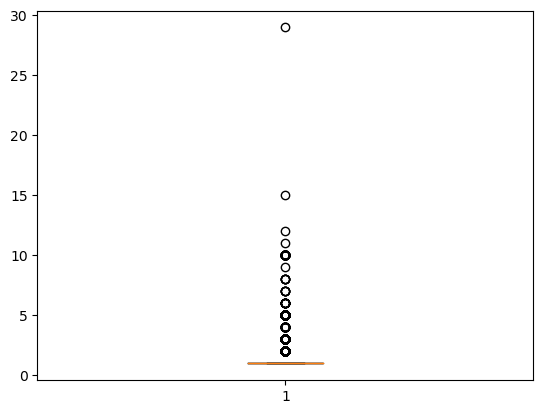

In [53]:
plt.boxplot('numItems',data=df)
plt.show()

In [54]:
print(df['numItems'].skew())
df['numItems'].describe()

13.335983660810362


count    39221.000000
mean         1.084751
std          0.566899
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         29.000000
Name: numItems, dtype: float64

- The skewness value of **13.3** shows that the variable **'numItems'** has a ***right-skewed distribution***, indicating the presence of extreme higher values. The maximum 'numItems' value of 29 proves this point.

In [55]:
Q1 = df['numItems'].quantile(0.25)

Q3 = df['numItems'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5*IQR

UL = Q3 + 1.5*IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 1.0 | Q3: 1.0 | IQR: 0.0 | LL: 1.0 | UL: 1.0


In [56]:
ul_outlier_count = df[df['numItems'] > UL].shape[0]
ll_outlier_count = df[df['numItems'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / df.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 1823 | LL_OC: 0 | T_OC: 1823 | T_OP: 4.648020193263813


- Here there are **1823 outliers** and all of them are over the Upper Limit
- To treat this we use **flooring and capping** method

In [57]:
print(df['numItems'].quantile(0.10))
print(df['numItems'].quantile(0.90))

1.0
1.0


In [58]:
df["numItems"] = np.where(df["numItems"] <1, 1,df['numItems'])
df["numItems"] = np.where(df["numItems"] >1, 1,df['numItems'])
print(df['numItems'].skew())

0


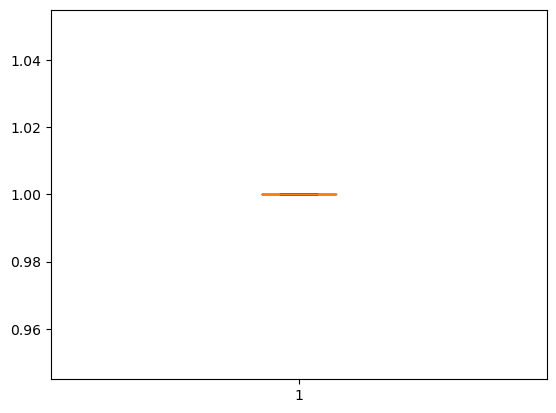

In [59]:
plt.boxplot('numItems',data=df)
plt.show()

# Treatment of Outliers present in paymentMethodAgeDays

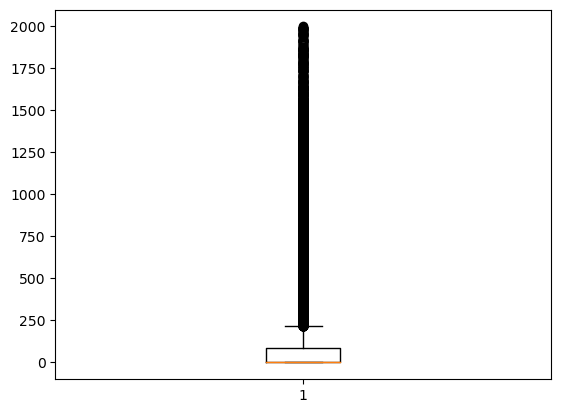

In [60]:
plt.boxplot('paymentMethodAgeDays',data=df)
plt.show()

In [61]:
print(df['paymentMethodAgeDays'].skew())
df['paymentMethodAgeDays'].describe()

3.238796486177889


count    39221.000000
mean       122.406976
std        283.446981
min          0.000000
25%          0.000000
50%          0.000000
75%         87.000000
max       1999.000000
Name: paymentMethodAgeDays, dtype: float64

- The skewness value of **3.2** shows that the variable **'paymentMethodAgeDays'** has a ***right-skewed distribution***, indicating the presence of extreme higher values. The maximum 'paymentMethodAgeDays' value of 1999 proves this point.

In [62]:
Q1 = df['paymentMethodAgeDays'].quantile(0.25)

Q3 = df['paymentMethodAgeDays'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5*IQR

UL = Q3 + 1.5*IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 0.0 | Q3: 87.0 | IQR: 87.0 | LL: -130.5 | UL: 217.5


In [63]:
ul_outlier_count = df[df['paymentMethodAgeDays'] > UL].shape[0]
ll_outlier_count = df[df['paymentMethodAgeDays'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / df.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 6367 | LL_OC: 0 | T_OC: 6367 | T_OP: 16.23365034037888


In [64]:
print(df['paymentMethodAgeDays'].quantile(0.10))
print(df['paymentMethodAgeDays'].quantile(0.90))

0.0
437.0


In [65]:
df["paymentMethodAgeDays"] = np.where(df["paymentMethodAgeDays"] <0, 0,df['paymentMethodAgeDays'])
df["paymentMethodAgeDays"] = np.where(df["paymentMethodAgeDays"] >437, 437,df['paymentMethodAgeDays'])
print(df['paymentMethodAgeDays'].skew())

1.6907593241035286


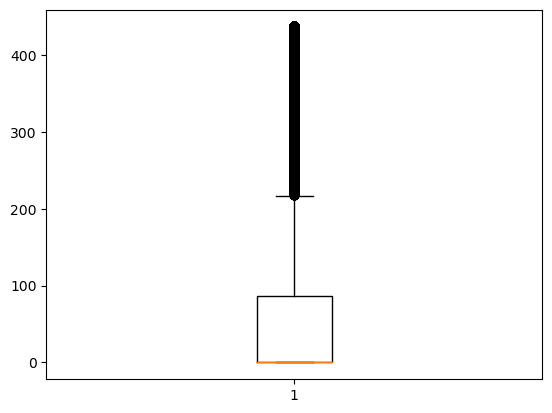

In [66]:
plt.boxplot('paymentMethodAgeDays',data=df)
plt.show()

In [67]:
df

,accountAgeDays,numItems,localTime_month,localTime_weekday,localTime_hour,localTime_minute,localTime_seconds,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,paymentMethodAgeDays,isWeekend,Category_electronics,Category_food,Category_shopping,Target
0,29,1,1,3,0,0,0,0,1,0,28,0.0,0,0,1,0
1,725,1,1,3,0,0,0,0,0,1,0,0.0,1,0,0,0
2,845,1,1,3,0,0,0,1,0,0,0,1.0,0,1,0,0
3,503,1,1,3,0,0,0,1,0,0,0,1.0,1,0,0,0
4,2000,1,1,3,0,0,0,1,0,0,0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39216,986,1,1,3,0,0,0,1,0,0,0,0.0,0,0,1,0
39217,1647,1,1,3,0,0,0,1,0,0,377,0.0,0,0,1,0
39218,1591,1,1,3,0,0,0,1,0,0,0,1.0,0,0,1,0
39219,237,1,1,3,0,0,0,1,0,0,236,1.0,0,0,1,0


# Splitting the dataset

In [68]:
x = df.iloc[:,0:15]

In [69]:
x

,accountAgeDays,numItems,localTime_month,localTime_weekday,localTime_hour,localTime_minute,localTime_seconds,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,paymentMethodAgeDays,isWeekend,Category_electronics,Category_food,Category_shopping
0,29,1,1,3,0,0,0,0,1,0,28,0.0,0,0,1
1,725,1,1,3,0,0,0,0,0,1,0,0.0,1,0,0
2,845,1,1,3,0,0,0,1,0,0,0,1.0,0,1,0
3,503,1,1,3,0,0,0,1,0,0,0,1.0,1,0,0
4,2000,1,1,3,0,0,0,1,0,0,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39216,986,1,1,3,0,0,0,1,0,0,0,0.0,0,0,1
39217,1647,1,1,3,0,0,0,1,0,0,377,0.0,0,0,1
39218,1591,1,1,3,0,0,0,1,0,0,0,1.0,0,0,1
39219,237,1,1,3,0,0,0,1,0,0,236,1.0,0,0,1


In [70]:
y = df.iloc[:,15]
y

0        0
1        0
2        0
3        0
4        0
        ..
39216    0
39217    0
39218    0
39219    0
39220    0
Name: Target, Length: 39221, dtype: int64

**NOTE:**
- We choose to keep the outliers in the ***paymentMethodAgeDays*** as it is because when we split the entire dataset into two datasets by relying upon outlier percentage present in that column, one of the datasets didn't have any 1, it only had 0 based upon which it is not possible to apply classification algorithm. Hence we decided to include the outliers present in the data

# Train - Test split of models

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=7)

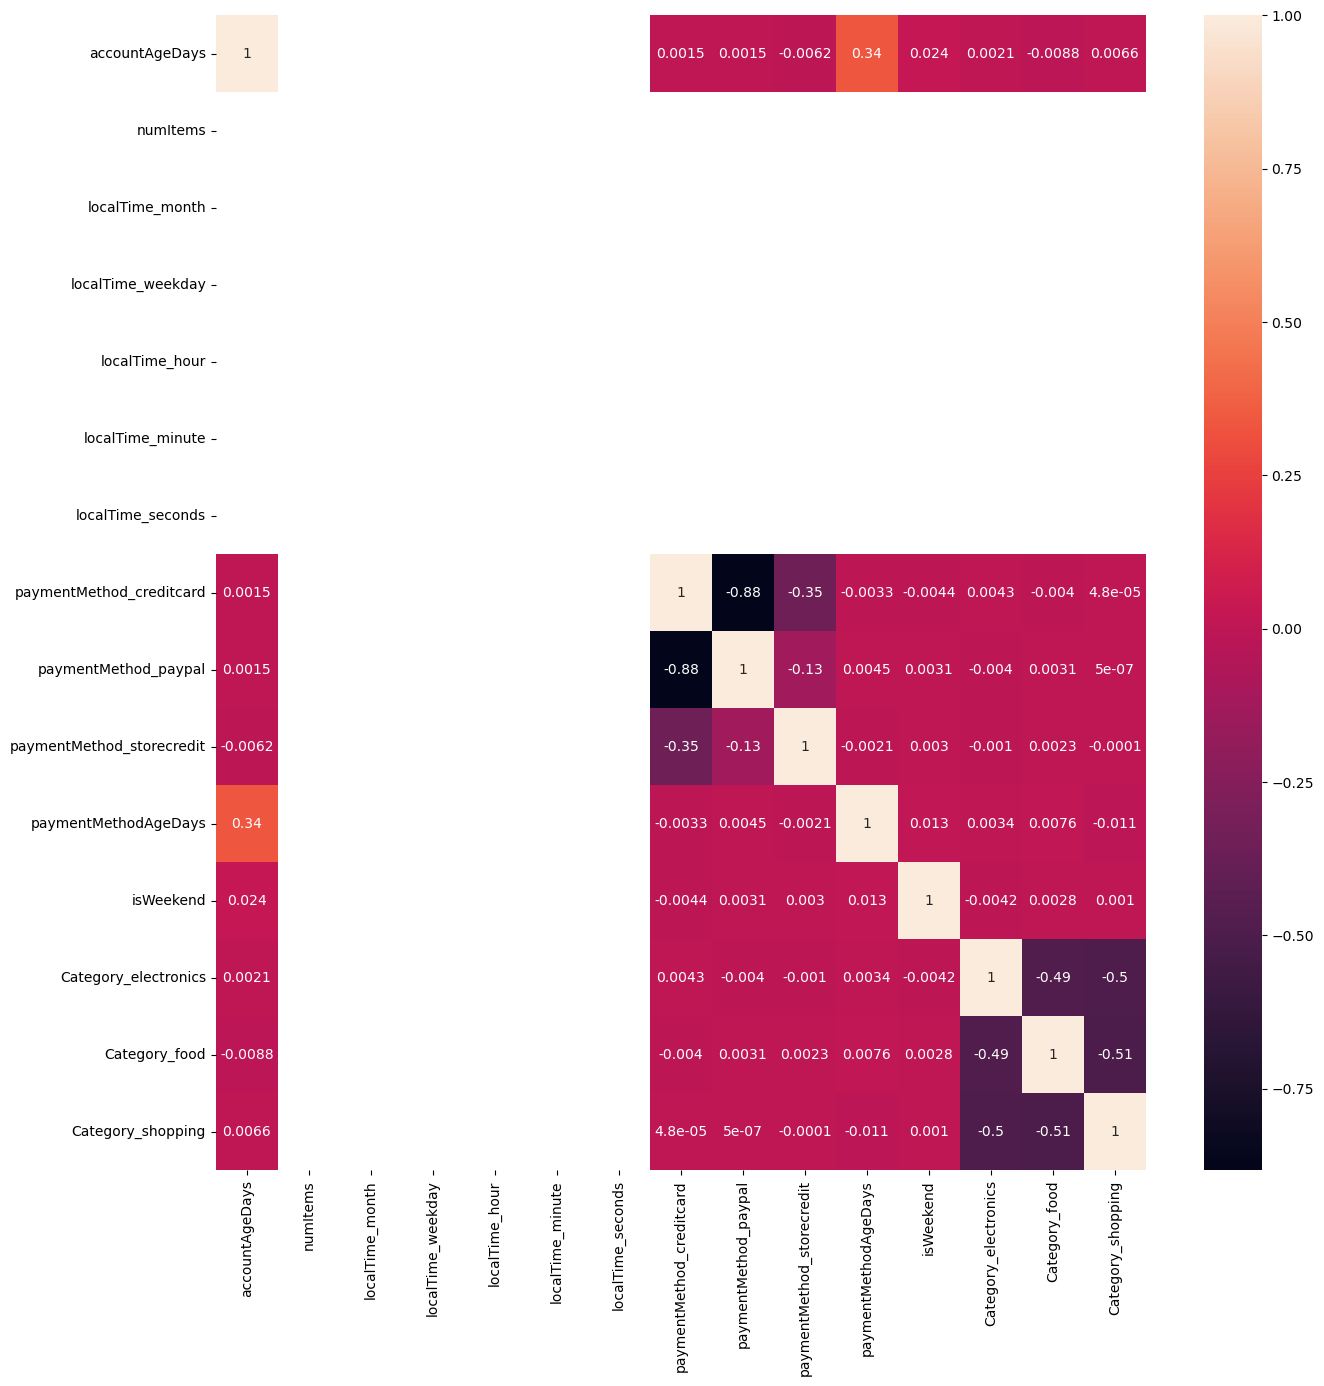

In [72]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train.corr(),annot=True,fmt='.2g')
plt.show()

In [73]:
x_train = x_train.drop(['numItems','localTime_month','localTime_weekday','localTime_hour','localTime_minute','localTime_seconds'],axis=1)

In [74]:
x_train.head()

,accountAgeDays,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,paymentMethodAgeDays,isWeekend,Category_electronics,Category_food,Category_shopping
32218,169,1,0,0,168,0.0,0,0,1
1458,17,1,0,0,0,0.0,1,0,0
35468,3,1,0,0,2,0.0,0,1,0
21989,2000,1,0,0,437,0.0,0,1,0
9839,2000,0,1,0,309,0.0,0,1,0


In [75]:
x_test = x_test.drop(['numItems','localTime_month','localTime_weekday','localTime_hour','localTime_minute','localTime_seconds'],axis=1)

In [76]:
x_test.head()

,accountAgeDays,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,paymentMethodAgeDays,isWeekend,Category_electronics,Category_food,Category_shopping
36088,110,1,0,0,109,0.0,1,0,0
1557,215,1,0,0,18,0.0,1,0,0
5467,38,0,1,0,0,1.0,0,0,1
27647,53,0,1,0,0,1.0,0,0,1
9070,2,1,0,0,0,1.0,0,1,0


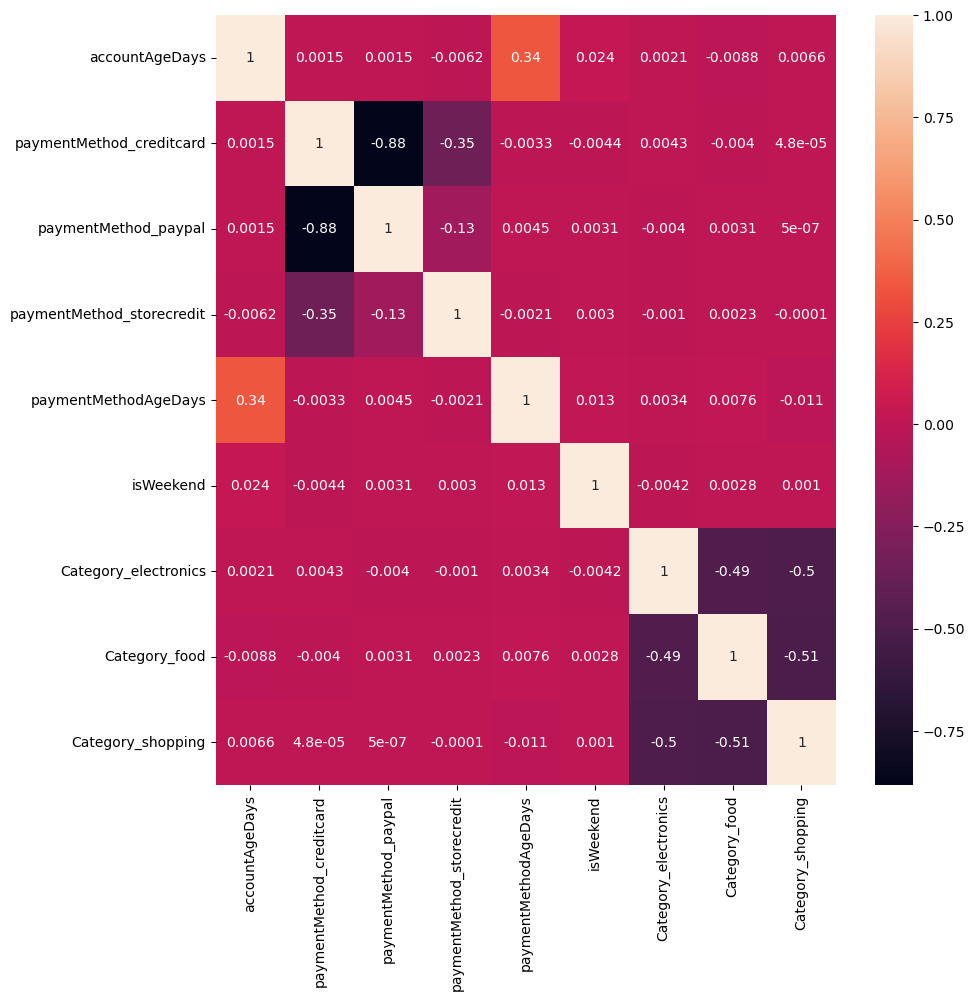

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(x_train.corr(),annot=True,fmt='.2g')
plt.show()

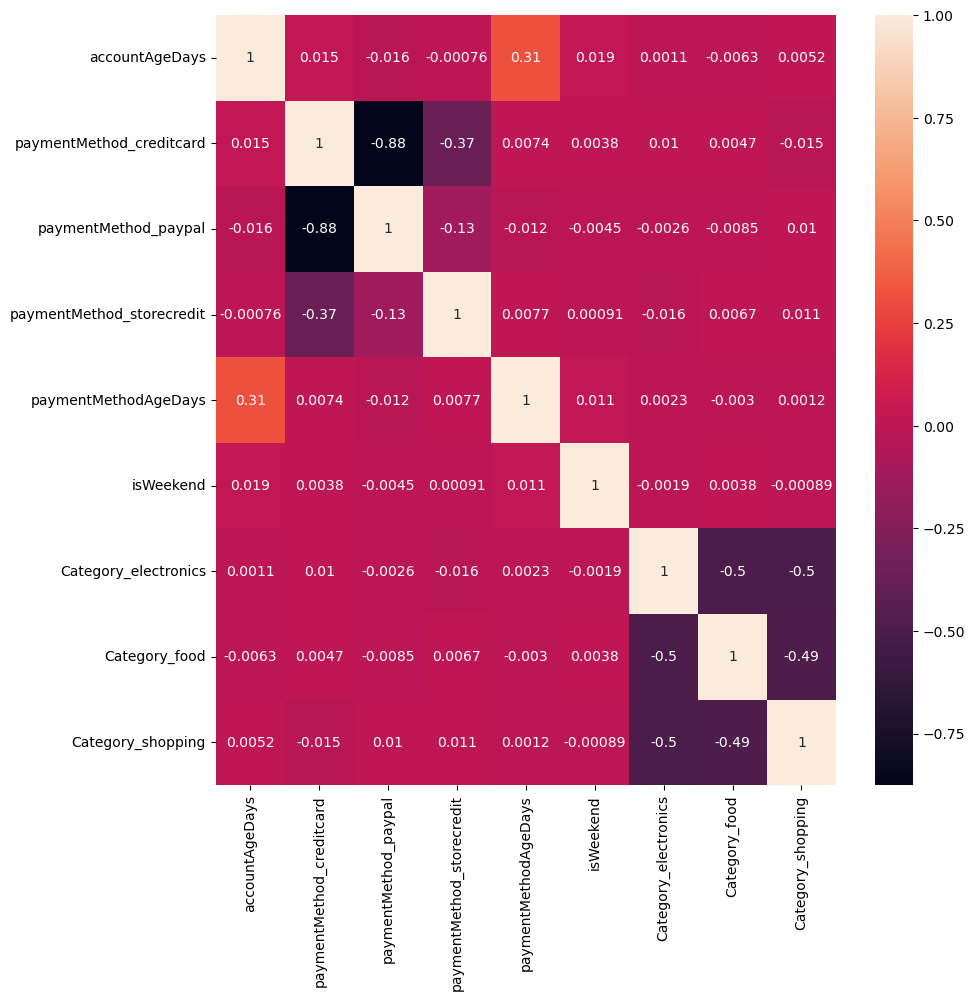

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(x_test.corr(),annot=True,fmt='.2g')
plt.show()

# Model Building and Model Evaluation

## Logistic Regression

In [79]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [81]:
classifier=LogisticRegression()
lr=classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred_train=classifier.predict(x_train)

In [82]:
print(classification_report(y_test,y_pred))
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9669
           1       0.00      0.00      0.00       137

    accuracy                           0.99      9806
   macro avg       0.49      0.50      0.50      9806
weighted avg       0.97      0.99      0.98      9806

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     28992
           1       0.00      0.00      0.00       423

    accuracy                           0.99     29415
   macro avg       0.49      0.50      0.50     29415
weighted avg       0.97      0.99      0.98     29415



In [83]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
conf_matrix

array([[9669,    0],
       [ 137,    0]], dtype=int64)

<Axes: >

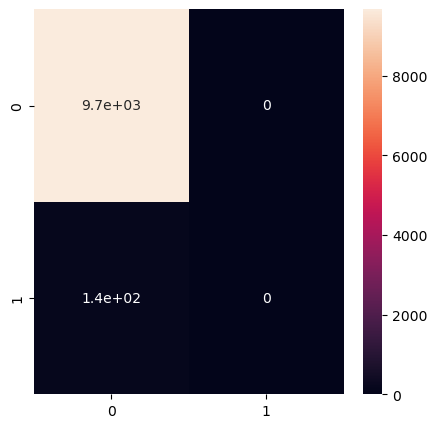

In [84]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)

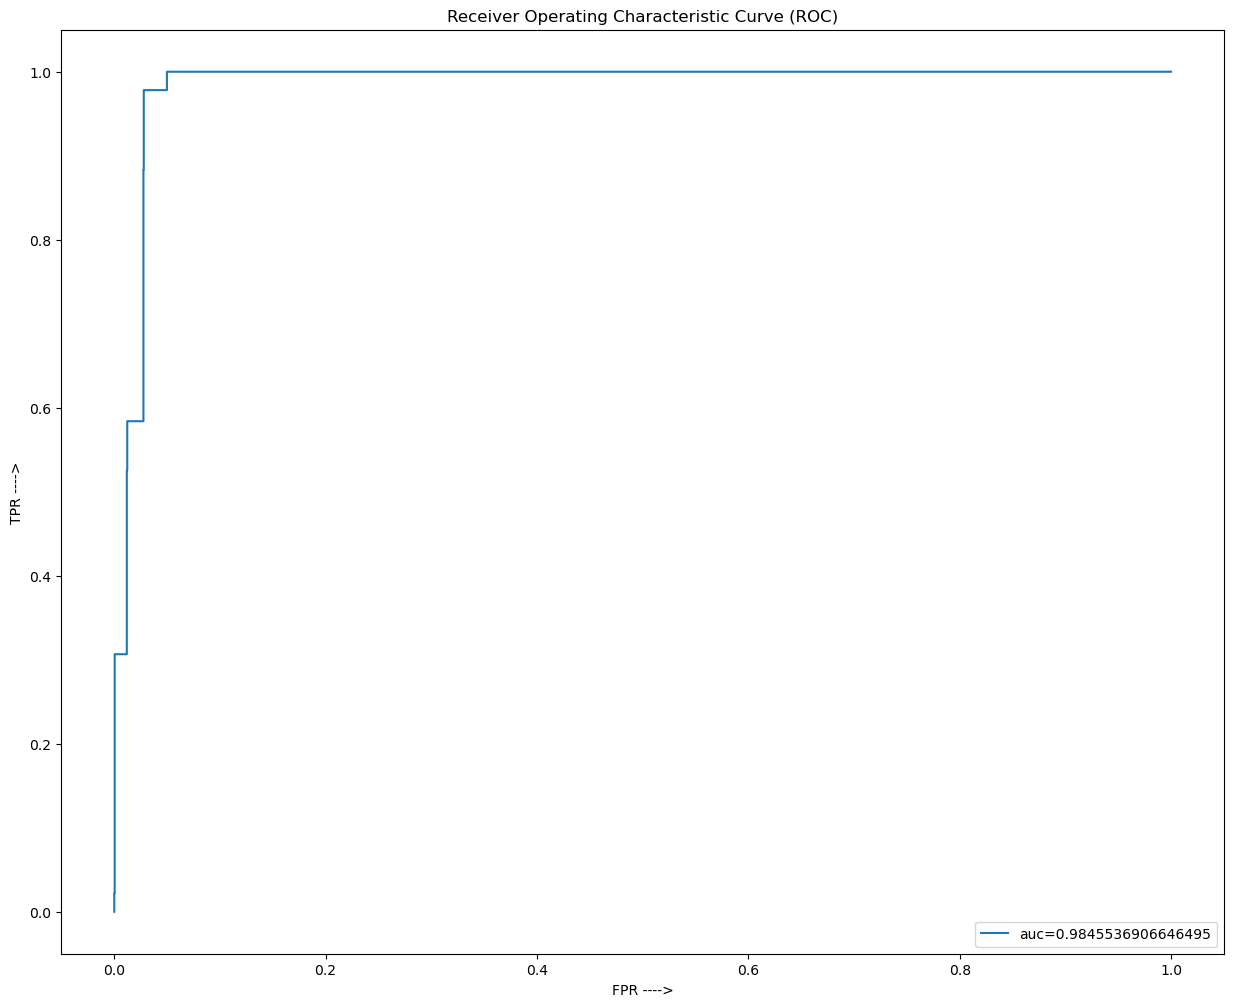

In [85]:
from sklearn import metrics
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(15,12))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

**Takeaways:**
- Have used Logistic Regression modelling as it is a Classification problem
- The area under the ROC curve(AUC) is seen to be 0.98, which means the model is going to give good results for the similar kind of data that it digests.
- It also means that the fraudulent transactions can be predicted efficiently and can be avoided.

## Decison Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(random_state=7, max_depth=5,
                                   criterion='gini',max_leaf_nodes=7)

dt=classifier2.fit(x_train,y_train)
y_pred=classifier2.predict(x_test)
y_pred_train=classifier2.predict(x_train)

print(classification_report(y_test,y_pred))
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9669
           1       1.00      1.00      1.00       137

    accuracy                           1.00      9806
   macro avg       1.00      1.00      1.00      9806
weighted avg       1.00      1.00      1.00      9806

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28992
           1       1.00      1.00      1.00       423

    accuracy                           1.00     29415
   macro avg       1.00      1.00      1.00     29415
weighted avg       1.00      1.00      1.00     29415



## Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
classifier3=RandomForestClassifier(random_state=7, max_depth=11,
                                   criterion='gini',max_leaf_nodes=15,
                                  min_samples_split=40,n_estimators=30)

rf=classifier3.fit(x_train,y_train)
y_pred=classifier3.predict(x_test)
y_pred_train=classifier3.predict(x_train)

print(classification_report(y_test,y_pred))
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9669
           1       1.00      1.00      1.00       137

    accuracy                           1.00      9806
   macro avg       1.00      1.00      1.00      9806
weighted avg       1.00      1.00      1.00      9806

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28992
           1       1.00      1.00      1.00       423

    accuracy                           1.00     29415
   macro avg       1.00      1.00      1.00     29415
weighted avg       1.00      1.00      1.00     29415



## Gradient Boosting Classifier

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=7,n_estimators=50,
                              max_depth=11)
gbc1=gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
y_pred_train=gbc.predict(x_train)

print(classification_report(y_test,y_pred))
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9669
           1       1.00      1.00      1.00       137

    accuracy                           1.00      9806
   macro avg       1.00      1.00      1.00      9806
weighted avg       1.00      1.00      1.00      9806

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28992
           1       1.00      1.00      1.00       423

    accuracy                           1.00     29415
   macro avg       1.00      1.00      1.00     29415
weighted avg       1.00      1.00      1.00     29415



## Support Vector Classifier

In [89]:
from sklearn.svm import SVC
svc=SVC(random_state=7)
svm=svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
y_pred_train=svc.predict(x_train)

print(classification_report(y_test,y_pred))
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9669
           1       0.00      0.00      0.00       137

    accuracy                           0.99      9806
   macro avg       0.49      0.50      0.50      9806
weighted avg       0.97      0.99      0.98      9806

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     28992
           1       0.00      0.00      0.00       423

    accuracy                           0.99     29415
   macro avg       0.49      0.50      0.50     29415
weighted avg       0.97      0.99      0.98     29415



# Conclusion

- The model has been well classified and can perform efficiently
- The model has performed significantly well in all the used machine learning algorithms
- Hence the banking system will be working fine and the fraudulent transactions can be detected and avoided